# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [15]:
#Visualización
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import pandas as pd
import numpy as np

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

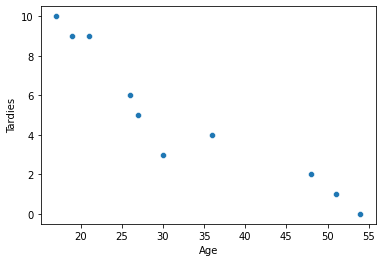

In [3]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


`The relationship about the age and number of tardies is negative. The scatterplot shows that the younger students are, the more often they are late to class.`

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#The covariance shows that the relationship about X and Y is inverse o negative.
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [6]:
#Strong and inverse relation because the value is close to -1
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
lr = LinearRegression()

lr.fit(
    X = student_data[["Age"]],
    y = student_data.Tardies
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [8]:
beta_1

-0.2428207709159809

In [9]:
beta_0

12.888803363135771

In [10]:
print(f"y = {round(beta_0,2)} + {round(beta_1,2)}·x")

y = 12.89 + -0.24·x


In [11]:
#Linear regression model
student_data["predict_tardies"] = beta_0 + beta_1 * student_data.Age
student_data

,Age,Tardies,predict_tardies
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


<function matplotlib.pyplot.show(close=None, block=None)>

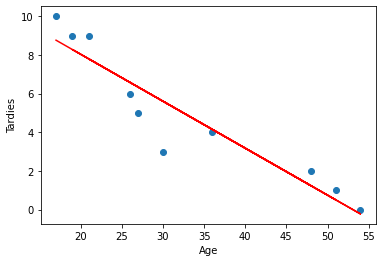

In [13]:
y_hat = beta_0 + beta_1 * student_data.Age
plt.scatter(student_data.Age,student_data.Tardies) 
plt.plot(student_data.Age, y_hat, lw=1.5, color="red") 
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
#Calculate the error
print("RMSE: " , np.sqrt(metrics.mean_squared_error(student_data.Tardies, student_data.predict_tardies)))

RMSE:  1.1540884648655088


In [19]:
student_data["predict_tardies_mean"] = student_data.predict_tardies.mean()

In [21]:
TSS = ((student_data.Tardies - student_data.predict_tardies_mean) **2 ).sum()
RSS = ((student_data.Tardies - student_data.predict_tardies)**2).sum()
r2 = ( TSS - RSS ) / ( TSS )
r2

0.8820265558250109

`RSS` shows the error of the estimate

`r2` measures how good our regression model is

Our regression model is good because is near to 1

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [25]:
# Import any libraries you may need & the data
data = pd.read_csv("vehicles.csv", index_col=0)
data.head()

,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,,,,,,
AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [26]:
# Your response here. 
data.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


<AxesSubplot:>

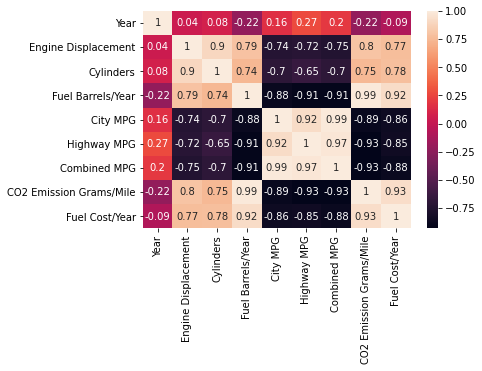

In [27]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

`As I can see in the heatmap, I consider that the variable Fuel Barrels/Years is the most important in determining CO2 emissions because it has a strong positive correlation with CO2 Emission Grams/Mile`

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [31]:
lr.fit(
    X = data[["Year","Cylinders", "Fuel_Barrels_Year", "Combined_MPG", "Fuel_Cost_Year"]],
    y = data["CO2_Emission_Grams_Mile"]
)

beta_1 = lr.coef_[0]
beta_2 = lr.coef_[1]
beta_3 = lr.coef_[2]
beta_4 = lr.coef_[3]
beta_5 = lr.coef_[4]
beta_0 = lr.intercept_

In [32]:
print(f"y = {round(beta_0,2)} {round(beta_1,2)}·x1 + {round(beta_2,2)}·x2 + {round(beta_3,2)}·x3 {round(beta_4,2)}·x4 + {round(beta_5,2)}·x5")

y = 769.89 -0.32·x1 + 1.88·x2 + 19.05·x3 -3.04·x4 + 0.03·x5


`I am using Linear Regression`

`As I said before, the variable Fuel Barrels_Year is the best`

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [28]:
data.rename(columns={"Fuel Barrels/Year":"Fuel_Barrels_Year", "Combined MPG" : "Combined_MPG", "CO2 Emission Grams/Mile" : "CO2_Emission_Grams_Mile", "Fuel Cost/Year" : "Fuel_Cost_Year"  }, inplace=True)

In [29]:
# Your response here. 
results = smf.ols("CO2_Emission_Grams_Mile ~ Fuel_Barrels_Year + Combined_MPG +  Fuel_Cost_Year + Year + Cylinders", data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                             19:11:03   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`We can conclude that:`
- The model explains 98% of the variable in CO2_Emission_Grams_Mile
- Coef is the measurement of how change in that variable affects the CO2_Emission_Grams_Mile (in this case, Fuel_Barrels_Year have a positive coef and the change is greater than the others)


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 